<a href="https://colab.research.google.com/github/ArpitChaudhary2390/Cats---Dogs-Cnn-classification/blob/main/Cats_vs_Dogs_CNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 CNN Image Classification of Cats and Dogs
Complete working model using TensorFlow on Google Colab

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Load dataset
(train_ds, val_ds), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.BO6PO9_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [3]:
# Preprocess
IMG_SIZE = 128
BATCH_SIZE = 32
def format_example(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label
train = train_ds.map(format_example).shuffle(1000).batch(BATCH_SIZE).prefetch(1)
val = val_ds.map(format_example).batch(BATCH_SIZE).prefetch(1)

In [4]:
# CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Train
history = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 558s 951ms/step - accuracy: 0.5855 - loss: 0.6644 - val_accuracy: 0.7343 - val_loss: 0.5417
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 551s 944ms/step - accuracy: 0.7129 - loss: 0.5516 - val_accuracy: 0.7777 - val_loss: 0.4709
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 571s 958ms/step - accuracy: 0.7750 - loss: 0.4698 - val_accuracy: 0.8100 - val_loss: 0.4113
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 553s 947ms/step - accuracy: 0.8239 - loss: 0.3899 - val_accuracy: 0.8151 - val_loss: 0.4015
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 564s 967ms/step - accuracy: 0.8571 - loss: 0.3394 - val_accuracy: 0.8325 - val_loss: 0.3931


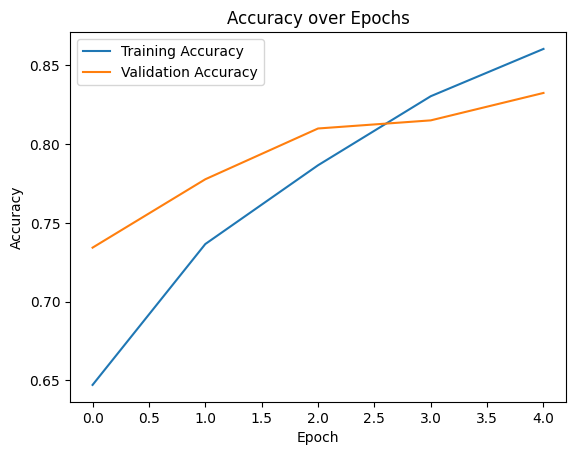

In [6]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
# Save model
model.save('cat_dog_cnn_model.h5')

In [8]:
# Prediction Function
def predict_image(img_path):
    img = Image.open(img_path).resize((IMG_SIZE, IMG_SIZE))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, IMG_SIZE, IMG_SIZE, 3)
    prediction = model.predict(img_array)[0][0]
    if prediction > 0.5:
        print("Prediction: 🐶 Dog")
    else:
        print("Prediction: 🐱 Cat")